In [ ]:
import numpy as np 

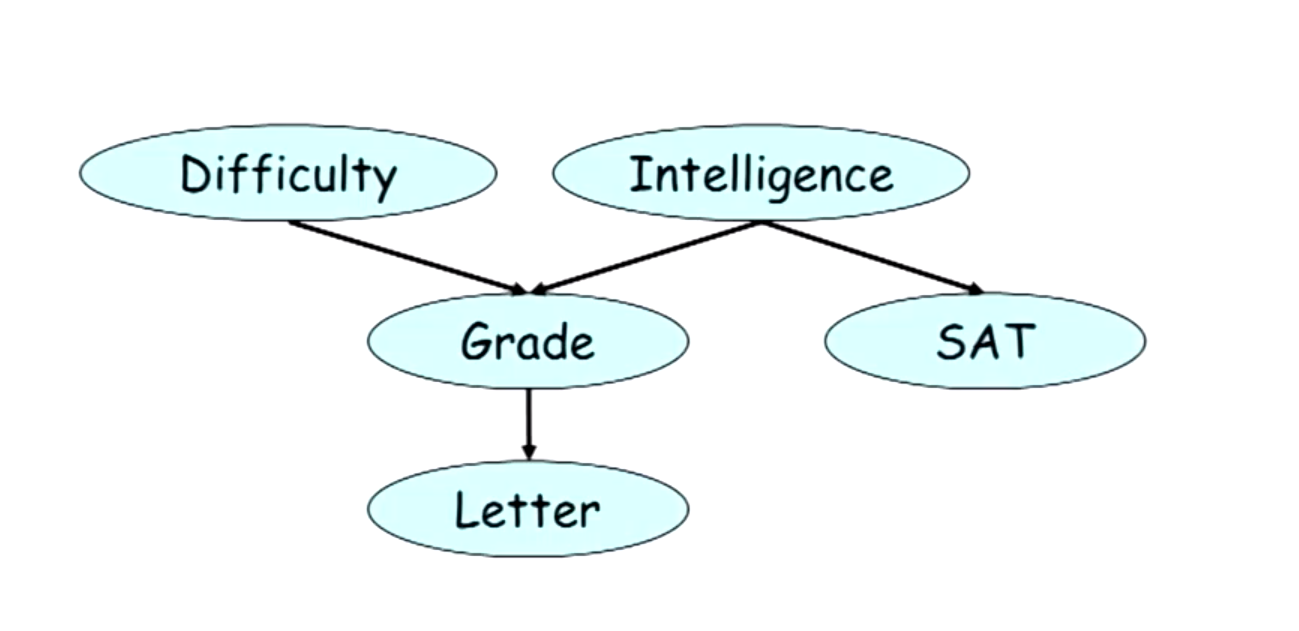

I : Intelligence <br>
D : Difficulty<br>
G : Grade <br>
L : Letter<br>
S : SAT

In [ ]:
D = np.array( [ 0.6, 0.4 ] )
I = np.array( [ 0.7, 0.3 ]  )
G_i_d = np.array( [ [[ 0.3 , 0.4, 0.3  ], [ 0.05, 0.25, 0.7 ]],[ [ 0.9, 0.08, 0.02 ], [0.5, 0.3, 0.2]] ])
L_g = np.array( [ [ 0.1, 0.9 ], [0.4, 0.6 ], [0.99, 0.01 ] ] )
S_i = np.array( [ [ 0.95, 0.05 ], [ 0.2, 0.8 ] ] ) 

$$P(D,I,G,S,L) = P(D)P(I)P(G|D,I)P(S|D,I,G)P(L|D,I,G,S)$$

In [ ]:
P_d0_i1_g3_s1_l1 = D[0] * I[1] * G_i_d[ 1 , 0 , 2 ] * S_i[1,1] * L_g[ 2, 1 ]
print( P_d0_i1_g3_s1_l1 ) 

def probability_Student( D, I, G_i_d, L_g, S_i, i, d, g, l, s):

  return D[ d ] * I[ i ] * G_i_d[ i, d, g ] * L_g[ g, l ] * S_i[ i, s ]  


2.8800000000000002e-05


In [ ]:
probability_Student( D, I, G_i_d, L_g, S_i, 1, 0, 2, 1, 1)

2.8800000000000002e-05

### <center>Causal Reasoning</center>


In [ ]:
def probability_Student_Causal_for_L( D, I, G_i_d, L_g, S_i, i, d, g, l, s):

  if i is not None and d is not None :
    ps_grades = G_i_d[i,d,:]
  if i is not None and d is None:
    print(G_i_d[i,:,:])
    ps_grades = np.tensordot( D, G_i_d[i,:,:], axes=((0),(0)))
  if i is None and d is None:
    print( G_i_d[0] , " and ", G_i_d[1] )
    ps_grades = np.tensordot( I, G_i_d, axes=((0),(0)) )
    print(ps_grades)
    ps_grades = np.tensordot( D, ps_grades, axes=((0),(0)))
  ps_letter = L_g[ :, l] 

  print( ps_grades, " x ", ps_letter , " = " , np.dot(ps_grades,ps_letter)) 

  return np.dot(ps_grades,ps_letter) 

$$P(l_{1}|i_{0}, d_{0})$$

In [ ]:
probability_Student_Causal_for_L( D, I, G_i_d, L_g, S_i, 0, 0, 2, 1, 1)

[0.3 0.4 0.3]  x  [0.9  0.6  0.01]  =  0.513


0.513

$$P(l_{1}|i_{0})$$

In [ ]:
probability_Student_Causal_for_L( D, I, G_i_d, L_g, S_i, 0, None, 2, 1, 1)

[[0.3  0.4  0.3 ]
 [0.05 0.25 0.7 ]]
[0.2  0.34 0.46]  x  [0.9  0.6  0.01]  =  0.38859999999999995


0.38859999999999995

$$P(l_{1})$$

In [ ]:
probability_Student_Causal_for_L( D, I, G_i_d, L_g, S_i, None, None, 2, 1, 1)

[[0.3  0.4  0.3 ]
 [0.05 0.25 0.7 ]]  and  [[0.9  0.08 0.02]
 [0.5  0.3  0.2 ]]
[[0.48  0.304 0.216]
 [0.185 0.265 0.55 ]]
[0.362  0.2884 0.3496]  x  [0.9  0.6  0.01]  =  0.502336


0.502336

### <center>Evidential Reasoning</center>

In [ ]:
P_d1 = D[1]
print( "P(d1) = " , P_d1 )

P(d1) =  0.4


array([[0.54 , 0.272, 0.188],
       [0.23 , 0.27 , 0.5  ]])